In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import DBSCAN, KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('flare')
results= []

In [2]:
data = pd.read_csv('wine-clustering (1).csv')

# Data Exploration

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,50615.000000,50615.000000,50615.000000,50615.000000,50615.000000,50615.000000,50615.000000,50615.000000,50615.000000,50615.000000,50615.000000,50615.000000,50615.000000
mean,13.009900,3.508858,1.503080,22.528578,114.986506,2.004449,2.498441,0.501936,1.500314,6.002367,0.996747,2.504616,948.657532
std,1.413687,1.441237,0.295252,3.753988,17.618587,0.578000,0.866703,0.289223,0.290304,2.301099,0.576680,0.863968,318.648224
min,11.000000,0.740000,1.000000,10.600000,70.000000,0.980000,0.340000,0.000000,0.410000,1.280000,0.000000,1.000000,278.000000
25%,12.000000,2.260000,1.250000,19.290000,100.000000,1.510000,1.750000,0.250000,1.250000,4.020000,0.500000,1.750000,672.000000
50%,13.000000,3.510000,1.500000,22.560000,115.000000,2.000000,2.500000,0.500000,1.500000,6.000000,1.000000,2.510000,948.000000
75%,14.000000,4.760000,1.760000,25.790000,130.000000,2.510000,3.240000,0.750000,1.750000,8.000000,1.490000,3.250000,1225.500000
max,15.000000,6.000000,3.230000,30.000000,162.000000,3.880000,5.080000,1.000000,3.580000,13.000000,2.000000,4.000000,1680.000000


In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.duplicated().any()

False

# Data Visualization

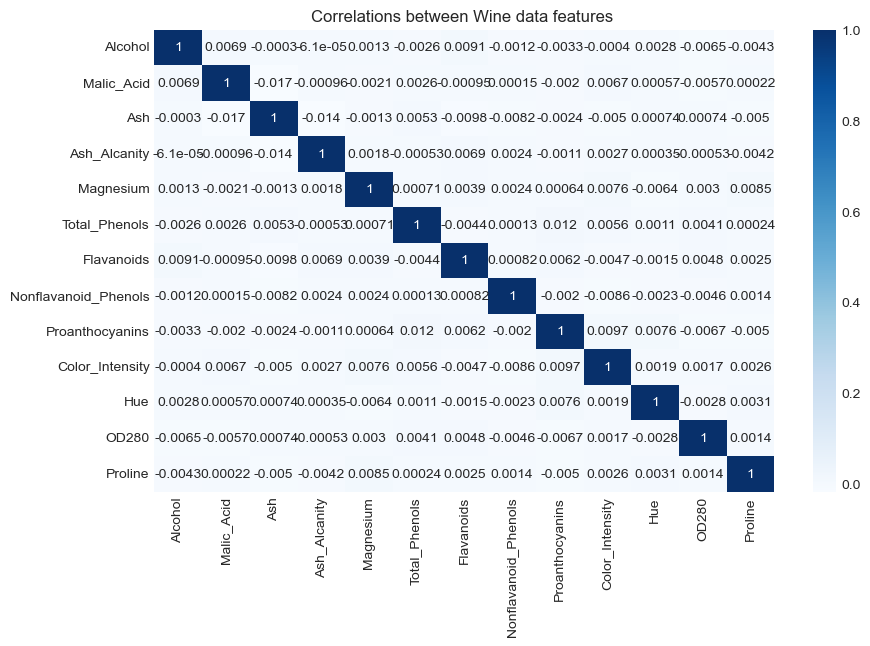

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.title('Correlations between Wine data features ')
plt.show()

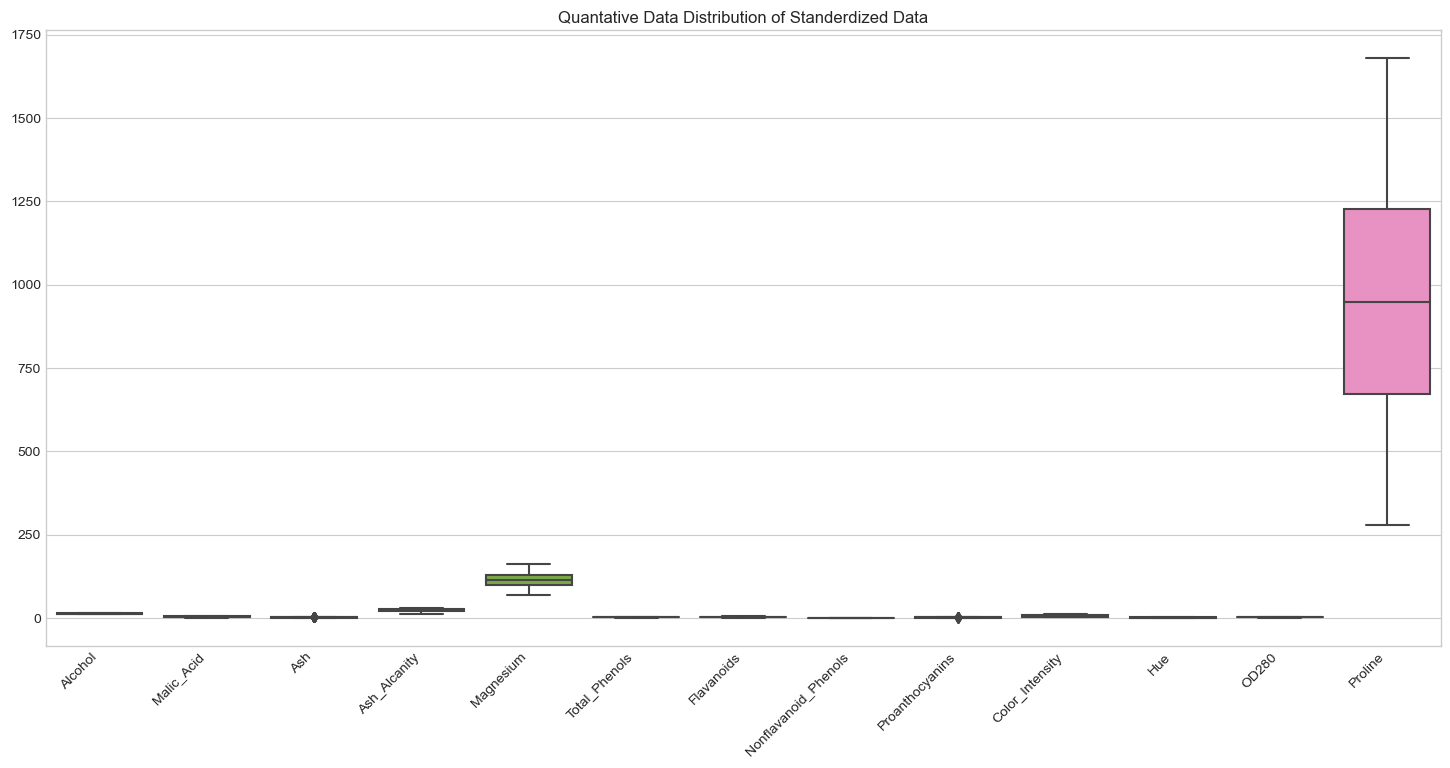

In [9]:
# visualize the data statistics using boxplot
plt.figure(figsize=(18,8))
plt.xticks(rotation=45, ha='right')
plt.title('Quantative Data Distribution of Standerdized Data')
sns.boxplot(data=data)
plt.show()

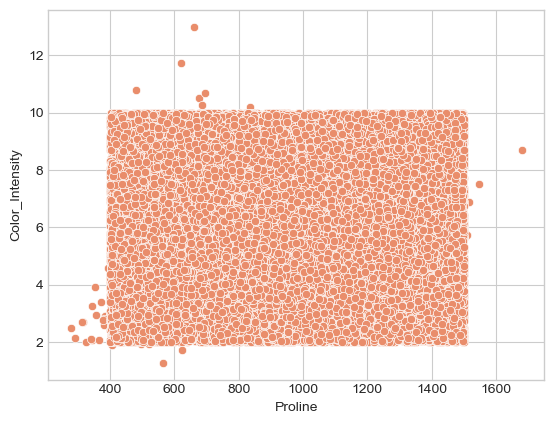

In [11]:
# Scatter Plot
sns.scatterplot(data= data, x="Proline", y ="Color_Intensity")
plt.show()

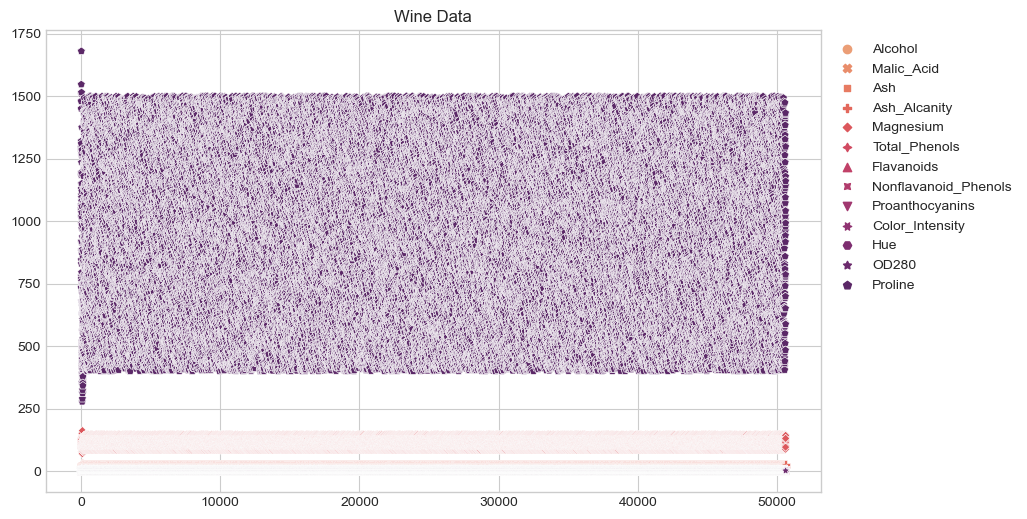

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= data,palette='flare')
plt.title('Wine Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [12]:
#train model
dbscan_cluster = DBSCAN(eps=2, min_samples=3)
y = dbscan_cluster.fit_predict(data)

In [14]:
#metrics
data_dbscan = data.drop([col for col in data.columns if col not in ["Flavanoids", "OD280"]], axis=1) 
data_dbscan["DBSCAN_First"] = y

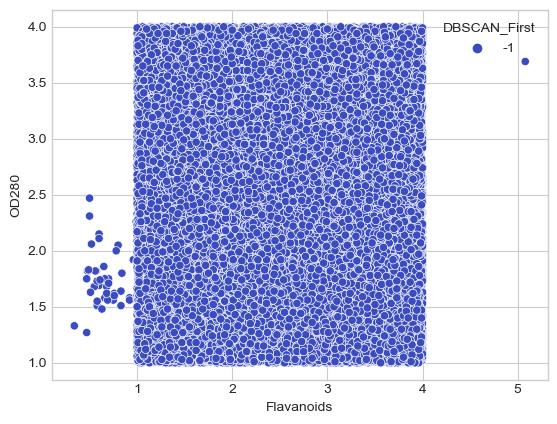

In [15]:
sns.scatterplot(data=data_dbscan, x="Flavanoids", y ="OD280", hue="DBSCAN_First", palette="coolwarm")
plt.show()

In [17]:
# Better Metrics
dbscan_cluster_adj = DBSCAN(eps=2.8, min_samples=14)
y_adj = dbscan_cluster_adj.fit_predict(data.values)

In [18]:
data["DBSCAN"] = y_adj

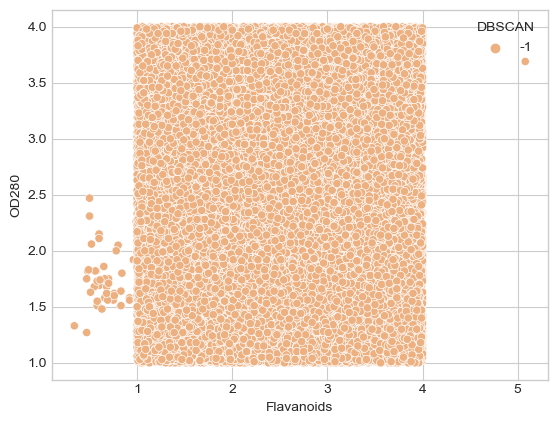

In [21]:
sns.scatterplot(data=data, x="Flavanoids", y ="OD280", hue="DBSCAN", palette="flare")
plt.show()

# Data Standardization using Z - Score normlization
Data standardization, also known as data normalization, is a preprocessing step in which the features of a dataset are scaled or transformed to have a mean of 0 and a standard deviation of 1. Standardizing the data is important, especially when working with algorithms that are sensitive to the scale of the input features, such as K-Means, Support Vector Machines (SVM), and Principal Component Analysis (PCA).

In Wine data, data is not standardized. Proline feature values are all above 250, some feature values are very small. As some Algorithms are sensitive to scale of input features, we need to standardize data. There are several methods to normalization like min-max normalization, z-score normalization or mean normalization. Here we used Z-score normalization also known as Standardization method.

In [9]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(data)
x_train, test = train_test_split(X_standardized, test_size=0.4,random_state=42 )
x_val, x_test = train_test_split(test, test_size= 0.5, random_state=42)

# K-means Clustering
K-Means clustering is a partitioning method that aims to partition a dataset into K clusters, where each data point belongs to the cluster with the nearest mean.

In [10]:
k_means = KMeans(n_clusters=3, n_init=5)

labels_train = k_means.fit_predict(x_train)
train_kmeans_avg = silhouette_score(x_train, labels_train)

labels_validation = k_means.predict(x_val)
val_kmeans_avg = silhouette_score(x_val, labels_validation)

labels_test = k_means.predict(x_test)
test_kmeans_avg = silhouette_score(x_test, labels_test)

results.append({'Model Name' : 'Kmeans',
                'Training Set ': train_kmeans_avg,
                'Validation Set' : val_kmeans_avg,
                 'Testing Set': test_kmeans_avg})

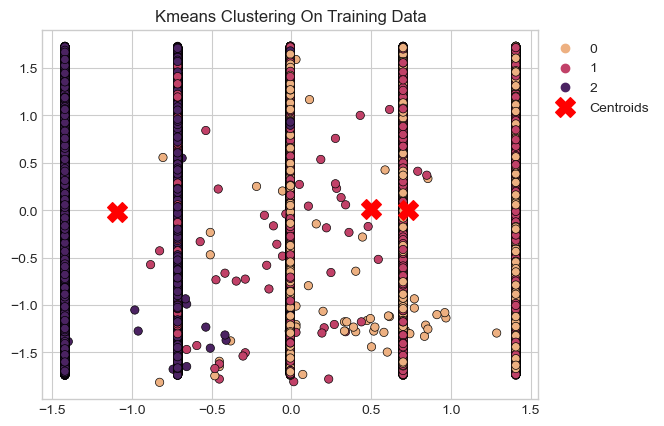

Silhouette Score on Training Set: 0.04894086696491196


In [11]:
sns.scatterplot(x=x_train[:,0], y= x_train[:,1], data= x_train, hue=labels_train,palette='flare',edgecolor='k')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Kmeans Clustering On Training Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

print(f'Silhouette Score on Training Set: {train_kmeans_avg}')

# Report

Wine Classification with K-means Clustering
This report explores the application of K-means clustering to a wine dataset, aiming to group wines with similar chemical properties.

Data and Methodology

The wine dataset likely contains various chemical features of the wines, such as alcohol content, malic acid, and ash levels. K-means clustering, an unsupervised machine learning algorithm, partitions data points into a predefined number of clusters (k). It iteratively assigns data points to the closest cluster centroid (mean) and refines the centroids until a convergence criterion is met.

Benefits of K-means Clustering

Simplicity and Efficiency: K-means is a straightforward algorithm, making it easy to implement and computationally efficient, especially for large datasets.
Interpretability: Each cluster is represented by its centroid, providing insights into the central characteristics of each wine group.
Scalability: K-means can handle large datasets effectively, making it suitable for real-world data analysis.
Results and Discussion

While the silhouette score (not provided) can be used to evaluate cluster quality, it's important to consider the inherent limitations of K-means in this context. Given the unsupervised nature of the task, pre-defined cluster structures might not perfectly capture the underlying relationships within the wine dataset.

However, K-means clustering can still offer valuable insights. Analyzing the centroids of each cluster can reveal trends in the chemical properties that differentiate wine types. For example, one cluster might have a high average alcohol content, while another might be characterized by higher acidity.

Conclusions and Future Work

K-means clustering provides a valuable initial exploration of the wine dataset. Although the silhouette score might indicate room for improvement, it can still provide a foundational understanding of potential wine groupings based on their chemical properties.

Here are some directions for future exploration:

Evaluate different values for k: Experimenting with different cluster numbers (k) might reveal more granular or broader groupings that better capture the data's structure.
Incorporate domain knowledge: Refining the feature set based on winemaking expertise could enhance the clustering results.
Explore alternative clustering algorithms: Depending on the data distribution, methods like hierarchical clustering or DBSCAN might be worth investigating.
By combining K-means analysis with further investigation, you can gain valuable insights into the characteristics that distinguish different wine types within the dataset.